In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import reflection as ref
import units_convertion as uconv

# Task 1 wood reflection
## Посчитать коэффициенты отражения/преломления на деревянной поверхности

at 0 deg:

AMPLITUDE:
r_in_plane = -0.0839
r_out_of_plane = 0.0839
t_in_plane = 1.0839
t_out_of_plane = 1.0839

POWER:
R_in_plane = 0.0070
R_out_of_plane = 0.0070
T_in_plane = 0.9930
T_out_of_plane = 0.9930


<IPython.core.display.Javascript object>


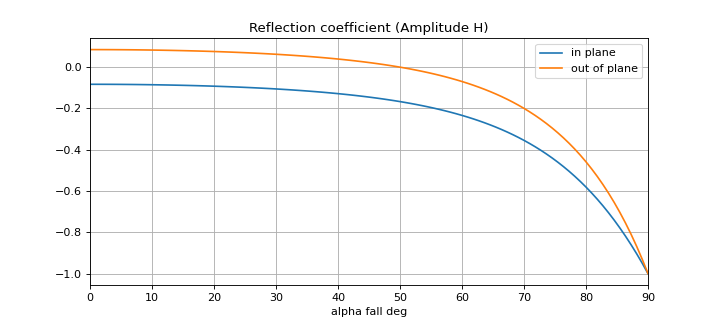

<IPython.core.display.Javascript object>


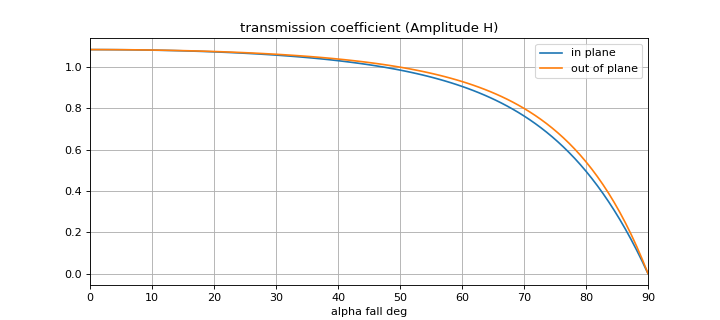

<IPython.core.display.Javascript object>


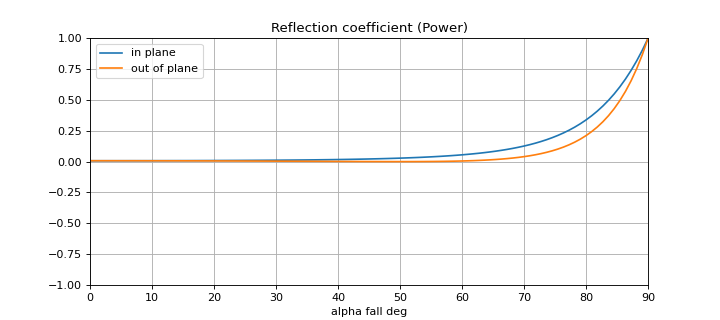

<IPython.core.display.Javascript object>


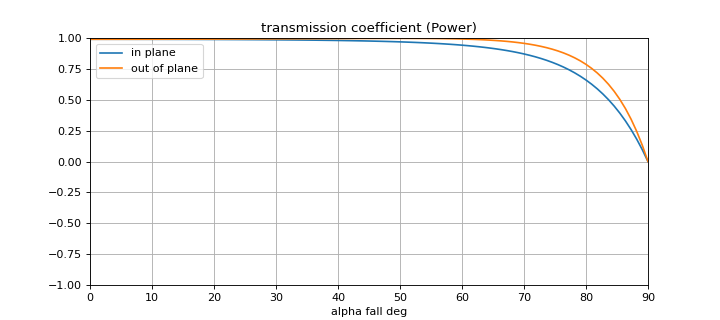

In [2]:
%matplotlib notebook

# считаем коэффициенты (отражения/преломления) для различных поляризаций по (амплитуде H/мощности)
eps_wood = 1.4
alpha_fall = np.linspace(0, np.pi/2, 100)

# амплитудные коэффициенты
r_ip = ref.Rh(alpha_fall, eps_pass=eps_wood, polarization='in_plane')
r_op = ref.Rh(alpha_fall, eps_pass=eps_wood, polarization='out_of_plane')
t_ip = ref.Th(alpha_fall, eps_pass=eps_wood, polarization='in_plane')
t_op = ref.Th(alpha_fall, eps_pass=eps_wood, polarization='out_of_plane')

# коэффициенты по мощности
R_ip = ref.Rp(alpha_fall, eps_pass=eps_wood, polarization='in_plane')
R_op = ref.Rp(alpha_fall, eps_pass=eps_wood, polarization='out_of_plane')
T_ip = ref.Tp(alpha_fall, eps_pass=eps_wood, polarization='in_plane')
T_op = ref.Tp(alpha_fall, eps_pass=eps_wood, polarization='out_of_plane')

# вывод коэффициентов при перпендикулярном падении
print("at 0 deg:\n")
print("AMPLITUDE:")
print("r_in_plane = {:.4f}".format(r_ip[0]))
print("r_out_of_plane = {:.4f}".format(r_op[0]))
print("t_in_plane = {:.4f}".format(t_ip[0]))
print("t_out_of_plane = {:.4f}".format(t_op[0]))
print("\nPOWER:")
print("R_in_plane = {:.4f}".format(R_ip[0]))
print("R_out_of_plane = {:.4f}".format(R_op[0]))
print("T_in_plane = {:.4f}".format(T_ip[0]))
print("T_out_of_plane = {:.4f}".format(T_op[0]))

# рисунки
fig = plt.figure(figsize=(9, 4))
plt.title('Reflection coefficient (Amplitude H)')
plt.xlabel("alpha fall deg")
plt.xlim(0, 90)
plt.grid(True)

plt.plot(np.rad2deg(alpha_fall), r_ip, label='in plane')
plt.plot(np.rad2deg(alpha_fall), r_op, label='out of plane')
plt.legend()

fig = plt.figure(figsize=(9, 4))
plt.title('transmission coefficient (Amplitude H)')
plt.xlabel("alpha fall deg")
plt.xlim(0, 90)
plt.grid(True)

plt.plot(np.rad2deg(alpha_fall), t_ip, label='in plane')
plt.plot(np.rad2deg(alpha_fall), t_op, label='out of plane')
plt.legend()

fig = plt.figure(figsize=(9, 4))
plt.title('Reflection coefficient (Power)')
plt.xlabel("alpha fall deg")
plt.xlim(0, 90)
plt.ylim(-1, 1)
plt.grid(True)

plt.plot(np.rad2deg(alpha_fall), R_ip, label='in plane')
plt.plot(np.rad2deg(alpha_fall), R_op, label='out of plane')
plt.legend()

fig = plt.figure(figsize=(9, 4))
plt.title('transmission coefficient (Power)')
plt.xlabel("alpha fall deg")
plt.xlim(0, 90)
plt.ylim(-1, 1)
plt.grid(True)

plt.plot(np.rad2deg(alpha_fall), T_ip, label='in plane')
plt.plot(np.rad2deg(alpha_fall), T_op, label='out of plane')
plt.legend()

# Task 2 Concrete wall
## Посчитать коэффициенты отражения преломления от/через бетонную стену 

In [4]:
# concrete wall of 30 cm width calculate reflection and transmission

# заданные параметры
eps_concrete = 4.5
w = 2.4e9*(2*np.pi)
l = 0.3

# считаем матрицу
m = ref.HE_mat(w, l, eps=eps_concrete)

# с помощью матрицы считаем коэффициенты
rh, th = ref.HE_mat_RhTh(m)

print("reflection and transmission coefs by amplitude:")
print("rh = {:.3}".format(rh))
print("th = {:.3}".format(th))

reflection and transmission coefs by amplitude:
rh = (0.569+0.195j)
th = (0.259-0.755j)


# Task 3 
## посчитать коэффициенты отражения/преломления от стеклопакета

In [5]:
# 3 layer window layer1=layer3, calculate rh, th

# Заданные параметры
w = 2.4e9*(2*np.pi)
l1 = 5e-3
l2 = 1e-2
eps1 = 3.8
eps2 = 1.

# считаем матрицы
m1 = ref.HE_mat(w, l1, eps=eps1)
m2 = ref.HE_mat(w, l2, eps=eps2)

#перемножаем матрицы и получаем коэффициенты
rh, th = ref.HE_mat_RhTh(m1@m2@m1)

print("reflection and transmission coefs by amplitude:")
print("rh = {:.3}".format(rh))
print("th = {:.3}".format(th))

reflection and transmission coefs by amplitude:
rh = (0.328-0.0257j)
th = (0.0738+0.941j)
